In [1]:
!pip install -q xlrd

In [ ]:
import pandas as pd
import numpy as np

In [5]:
raw_meteo_df = pd.read_excel("meteo.xlsx", sheet_name = 1)
raw_hydro_df = pd.read_excel("hydro.xlsx")

In [6]:
meteo_df = raw_meteo_df.drop(0) 
meteo_df['Unnamed: 0'] = pd.to_datetime(meteo_df['Unnamed: 0'], format='%d-%m-%Y')
meteo_df = meteo_df.set_index("Unnamed: 0").fillna(0.0)
meteo_df = meteo_df.loc[:, (np.arange(len(meteo_df.columns)) + 1) % 2 != 0]
meteo_df.index.rename('date', inplace=True)
meteo_df['CIESZYN (249180130)'] = meteo_df['CIESZYN (249180130)'] + meteo_df['CIESZYN (249180550)']
meteo_df = meteo_df.drop('CIESZYN (249180550)', axis=1)
meteo_df

,BARDO ŚLĄSKIE (250160410),BIERUTÓW (251170270),BOLESŁAWÓW (250160610),BOLKÓW (250160030),BORÓW (250160070),BRZEG (250170050),BRZEG DOLNY (251160230),CHWAŁKOWICE (251160170),CIESZYN (249180130),DŁUGOPOLE-ZDRÓJ (250160590),...,SZCZAWNO-ZDRÓJ (250160130),ŚWIERZAWA (251150360),TARNÓW (250160360),TRZEBNICA (251170210),TWARDOCICE (251150280),WALIM (250160270),WROCŁAW-STRACHOWICE (351160424),ZIELENIEC (250160530),ZIELINA (250170280),ŹRÓDŁA (251160370)
date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,0.2,0.5,0.5,0.7,0.2,0.0,0.8,0.8,0.2,2.2,...,0.0,0.6,0.8,0.0,0.5,0.0,0.3,7.0,0.5,0.0
2012-01-02,0.0,1.1,1.0,0.8,0.0,0.3,0.6,1.3,4.0,0.6,...,0.3,0.1,0.0,0.5,2.2,0.1,0.2,1.3,0.0,0.0
2012-01-03,2.2,0.9,5.6,0.0,0.0,0.0,0.1,0.0,0.1,7.5,...,0.0,0.0,0.0,0.1,0.0,0.2,0.1,9.5,0.0,0.0
2012-01-04,2.4,0.1,12.5,0.0,0.0,0.6,0.5,1.5,11.0,18.7,...,1.8,0.2,1.1,1.8,0.2,5.2,0.0,12.6,0.9,0.0
2012-01-05,8.9,7.1,23.0,10.2,0.5,1.0,3.0,6.5,4.3,27.6,...,5.4,10.5,6.6,8.8,9.3,12.9,2.5,46.0,6.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-12-28,2.4,0.0,2.8,1.2,5.7,3.1,2.8,2.2,1.8,1.5,...,1.7,2.3,0.6,0.0,3.0,0.2,3.5,6.7,4.5,3.8
2021-12-29,0.2,2.3,0.0,0.5,0.7,1.0,0.5,0.7,0.0,0.0,...,0.0,0.1,0.1,0.0,0.8,0.0,1.3,3.2,1.1,0.9


In [7]:
hydro_df = raw_hydro_df.drop(0).drop(1)
hydro_df['Unnamed: 0'] = pd.to_datetime(hydro_df['Unnamed: 0'], format='%Y-%m-%d')
hydro_df = hydro_df.set_index("Unnamed: 0")
hydro_df = hydro_df.rename(columns={'Unnamed: 1': 'result'})
hydro_df = hydro_df.drop('Unnamed: 2', axis=1)
hydro_df.index.rename('date', inplace=True)
hydro_df['result'] = hydro_df['result'].astype(float)
hydro_df

,result
date,
2011-11-01,199.0
2011-11-02,200.0
2011-11-03,194.0
2011-11-04,195.0
2011-11-05,192.0
...,...
2021-10-27,225.0
2021-10-28,224.0
2021-10-29,214.0


In [8]:
df = meteo_df.merge(hydro_df, left_index=True, right_index=True)
df

,BARDO ŚLĄSKIE (250160410),BIERUTÓW (251170270),BOLESŁAWÓW (250160610),BOLKÓW (250160030),BORÓW (250160070),BRZEG (250170050),BRZEG DOLNY (251160230),CHWAŁKOWICE (251160170),CIESZYN (249180130),DŁUGOPOLE-ZDRÓJ (250160590),...,ŚWIERZAWA (251150360),TARNÓW (250160360),TRZEBNICA (251170210),TWARDOCICE (251150280),WALIM (250160270),WROCŁAW-STRACHOWICE (351160424),ZIELENIEC (250160530),ZIELINA (250170280),ŹRÓDŁA (251160370),result
date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,0.2,0.5,0.5,0.7,0.2,0.0,0.8,0.8,0.2,2.2,...,0.6,0.8,0.0,0.5,0.0,0.3,7.0,0.5,0.0,199.0
2012-01-02,0.0,1.1,1.0,0.8,0.0,0.3,0.6,1.3,4.0,0.6,...,0.1,0.0,0.5,2.2,0.1,0.2,1.3,0.0,0.0,197.0
2012-01-03,2.2,0.9,5.6,0.0,0.0,0.0,0.1,0.0,0.1,7.5,...,0.0,0.0,0.1,0.0,0.2,0.1,9.5,0.0,0.0,197.0
2012-01-04,2.4,0.1,12.5,0.0,0.0,0.6,0.5,1.5,11.0,18.7,...,0.2,1.1,1.8,0.2,5.2,0.0,12.6,0.9,0.0,204.0
2012-01-05,8.9,7.1,23.0,10.2,0.5,1.0,3.0,6.5,4.3,27.6,...,10.5,6.6,8.8,9.3,12.9,2.5,46.0,6.1,0.0,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,225.0
2021-10-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,224.0
2021-10-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,214.0


In [9]:
from scipy import signal, fftpack
import pandas as pd
import numpy

In [10]:
corr = df.corr()


In [11]:
def cross_corr(x, y, lag=0):
    return x.corr(y.shift(lag))

def shift_Factor(x,y,R):
    x_corr = [cross_corr(x, y, lag=i) for i in range(R)]
    
    # R factor is the number of the shifts who should be checked by the function
    Kot = pd.DataFrame(list(x_corr)).reset_index()
    Kot.rename(columns={0:'Corr', 'index':'Shift_num'}, inplace=True)
    
    # We find optimal correlation shift
    Kot['abs'] = Kot['Corr'].abs()
    SF = Kot.loc[Kot['abs']==Kot['abs'].max(), 'Shift_num']
    p1 = SF.to_frame()
    SF = p1.Shift_num.max()
    
    return SF

In [12]:
MIN_RAIN_THRESHOLD = meteo_df.sum().sort_values().quantile(0.25)

In [13]:
y = df['result']    # dependent variable
R = 20  
filtered = meteo_df.sum().loc[lambda x : x > MIN_RAIN_THRESHOLD]
for col_name in filtered.index.values:
  x = df[col_name]       # independent variable
  x = x.ewm(span=4).mean()
  SKO = shift_Factor(y, x, R)
  print('Optimal shift for {}: {}, correlation: {}'.format(col_name, SKO, cross_corr(y, x, lag=SKO)))



Optimal shift for BARDO ŚLĄSKIE (250160410): 4, correlation: 0.20075168964765103
Optimal shift for BIERUTÓW (251170270): 5, correlation: 0.16374840574757848
Optimal shift for BOLESŁAWÓW (250160610): 4, correlation: 0.2271706684093963
Optimal shift for BOLKÓW (250160030): 5, correlation: 0.22186025673106133
Optimal shift for BORÓW (250160070): 5, correlation: 0.20465571476969707
Optimal shift for CHWAŁKOWICE (251160170): 5, correlation: 0.17107510863681327
Optimal shift for CIESZYN (249180130): 4, correlation: 0.28756468139815555
Optimal shift for DŁUGOPOLE-ZDRÓJ (250160590): 5, correlation: 0.20828698184434727
Optimal shift for DZIERŻONIÓW (250160260): 4, correlation: 0.20950190140968394
Optimal shift for DZIEWIĘTLICE (250170290): 4, correlation: 0.22022604262840714
Optimal shift for GŁUBCZYCE (250170390): 4, correlation: 0.2633756675402955
Optimal shift for GŁUCHOŁAZY (250170330): 4, correlation: 0.30386183977895115
Optimal shift for GRABOWNICA (251170150): 5, correlation: 0.215104206

In [14]:
filtered_df = df[np.append(filtered.index.values, ['result'])]
filtered_df

,BARDO ŚLĄSKIE (250160410),BIERUTÓW (251170270),BOLESŁAWÓW (250160610),BOLKÓW (250160030),BORÓW (250160070),CHWAŁKOWICE (251160170),CIESZYN (249180130),DŁUGOPOLE-ZDRÓJ (250160590),DZIERŻONIÓW (250160260),DZIEWIĘTLICE (250170290),...,SZALEJÓW GÓRNY (250160840),SZCZAWNO-ZDRÓJ (250160130),ŚWIERZAWA (251150360),TARNÓW (250160360),TRZEBNICA (251170210),TWARDOCICE (251150280),WALIM (250160270),WROCŁAW-STRACHOWICE (351160424),ZIELENIEC (250160530),result
date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,0.2,0.5,0.5,0.7,0.2,0.8,0.2,2.2,0.0,0.6,...,0.0,0.0,0.6,0.8,0.0,0.5,0.0,0.3,7.0,199.0
2012-01-02,0.0,1.1,1.0,0.8,0.0,1.3,4.0,0.6,0.0,0.0,...,0.0,0.3,0.1,0.0,0.5,2.2,0.1,0.2,1.3,197.0
2012-01-03,2.2,0.9,5.6,0.0,0.0,0.0,0.1,7.5,1.0,0.0,...,0.0,0.0,0.0,0.0,0.1,0.0,0.2,0.1,9.5,197.0
2012-01-04,2.4,0.1,12.5,0.0,0.0,1.5,11.0,18.7,1.5,1.3,...,0.0,1.8,0.2,1.1,1.8,0.2,5.2,0.0,12.6,204.0
2012-01-05,8.9,7.1,23.0,10.2,0.5,6.5,4.3,27.6,1.0,2.7,...,0.0,5.4,10.5,6.6,8.8,9.3,12.9,2.5,46.0,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,225.0
2021-10-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,224.0
2021-10-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,214.0


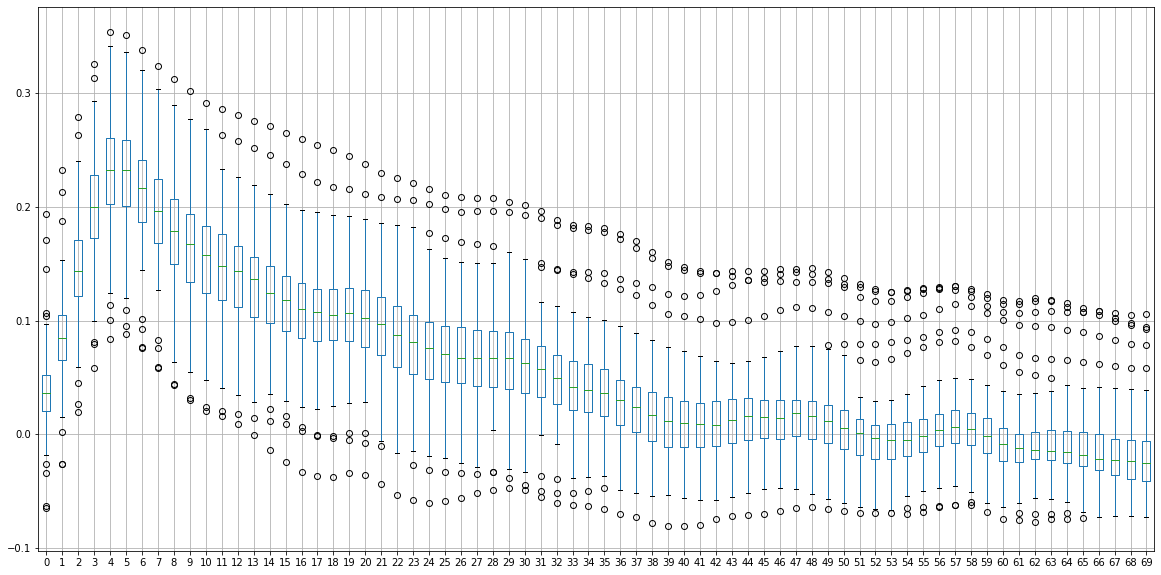

In [15]:
y = df['result']    # dependent variable
R = 70

corr_df = pd.DataFrame()
for col in filtered_df.columns:
   if (col != 'result'):
      x = df[col].ewm(span=5).mean()
      corr_df[col] = [cross_corr(y, x, lag=i) for i in range(R)]

corr_df.T.boxplot(figsize=(20, 10))

In [ ]:
# sinus in cosinus z 2pi*miesiac/12

# LSTM


In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
pd.options.mode.chained_assignment = None

In [381]:
clusters = pd.read_csv("clusters.csv")
clusters['Date'] = pd.to_datetime(clusters['Date'], format='%d-%m-%Y')
clusters = clusters.set_index("Date")
clusters

,0,1,2,3,4,5,6
Date,,,,,,,
2012-01-01,0.500,0.481818,0.373333,0.977778,0.754167,0.350000,0.22
2012-01-02,3.600,0.736364,0.153333,0.544444,0.370833,0.775000,0.81
2012-01-03,0.200,0.045455,0.046667,1.244444,2.579167,0.100000,0.81
2012-01-04,9.600,0.554545,0.720000,2.033333,6.804167,0.700000,2.26
2012-01-05,11.850,4.081818,3.960000,9.866667,17.691667,7.625000,4.46
...,...,...,...,...,...,...,...
2021-12-27,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2021-12-28,0.900,2.900000,2.653333,1.400000,1.433333,2.533333,1.50
2021-12-29,0.025,0.690909,0.500000,1.444444,0.191667,0.391667,0.30


In [383]:
features_df = filtered_df.loc[:, filtered_df.columns != 'result']
sum_series = features_df.T.sum()
sin_series = np.sin(2 * np.pi * features_df.index.month.values / 12.0)
cos_series = np.cos(2 * np.pi * features_df.index.month.values / 12.0)
target_series = filtered_df.loc[:, 'result']

target = ['result']
features = ['sum', 'sin', 'cos', '0', '1', '2', '3', '4', '5', '6']

features_df = sum_series.to_frame('sum').join(target_series)
features_df['sin'] = sin_series
features_df['cos'] = cos_series
features_df = features_df.merge(clusters, how='left', left_index=True, right_index=True)
features_df


,sum,result,sin,cos,0,1,2,3,4,5,6
date,,,,,,,,,,,
2012-01-01,41.9,199.0,0.500000,0.866025,0.50,0.481818,0.373333,0.977778,0.754167,0.350,0.22
2012-01-02,46.9,197.0,0.500000,0.866025,3.60,0.736364,0.153333,0.544444,0.370833,0.775,0.81
2012-01-03,78.4,197.0,0.500000,0.866025,0.20,0.045455,0.046667,1.244444,2.579167,0.100,0.81
2012-01-04,241.0,204.0,0.500000,0.866025,9.60,0.554545,0.720000,2.033333,6.804167,0.700,2.26
2012-01-05,709.1,205.0,0.500000,0.866025,11.85,4.081818,3.960000,9.866667,17.691667,7.625,4.46
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-27,0.0,225.0,-0.866025,0.500000,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.00
2021-10-28,0.0,224.0,-0.866025,0.500000,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.00
2021-10-29,0.0,214.0,-0.866025,0.500000,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.00


In [384]:
lstm_data = features_df
split = int(lstm_data.shape[0] * 2/3)
df_train = lstm_data.iloc[:split, :].copy()
df_test = lstm_data.iloc[split:, :].copy()

# scale the data
target_scaler = MinMaxScaler().fit(df_train[target])
df_train[target] = target_scaler.transform(df_train[target])
df_test[target] = target_scaler.transform(df_test[target])

features_scaler = MinMaxScaler().fit(df_train[features])
df_train[features] = features_scaler.transform(df_train[features])
df_test[features] = features_scaler.transform(df_test[features])

In [385]:
# extract the input sequences and output values
sequence_length = 10
X_train, y_train = [], []

for i in range(sequence_length, df_train.shape[0]):
    X_train.append(df_train[features + target].iloc[i - sequence_length: i])
    y_train.append(df_train[target].iloc[i])

X_train, y_train = np.array(X_train), np.array(y_train)

X_test, y_test = [], []

for i in range(sequence_length, df_test.shape[0]):
    X_test.append(df_test[features + target].iloc[i - sequence_length: i])
    y_test.append(df_test[target].iloc[i])

X_test, y_test = np.array(X_test), np.array(y_test)

print(X_train.shape)
print(X_test.shape)


(2384, 10, 11)
(1188, 10, 11)


In [386]:
# build and train the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=X_train.shape[1:]))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
75/75 [==============================] - 14s 41ms/step - loss: 0.0272
Epoch 2/30
75/75 [==============================] - 3s 41ms/step - loss: 0.0086
Epoch 3/30
75/75 [==============================] - 3s 42ms/step - loss: 0.0084
Epoch 4/30
75/75 [==============================] - 3s 41ms/step - loss: 0.0071
Epoch 5/30
75/75 [==============================] - 3s 40ms/step - loss: 0.0064
Epoch 6/30
75/75 [==============================] - 3s 41ms/step - loss: 0.0050
Epoch 7/30
75/75 [==============================] - 3s 41ms/step - loss: 0.0048
Epoch 8/30
75/75 [==============================] - 6s 75ms/step - loss: 0.0046
Epoch 9/30
75/75 [==============================] - 3s 41ms/step - loss: 0.0043
Epoch 10/30
75/75 [==============================] - 3s 41ms/step - loss: 0.0042
Epoch 11/30
75/75 [==============================] - 4s 56ms/step - loss: 0.0039
Epoch 12/30
75/75 [==============================] - 3s 40ms/step - loss: 0.0041
Epoch 13/30
75/75 [=================

In [387]:
model.fit(X_train, y_train, epochs=30, batch_size=32)

model.evaluate(X_test, y_test)

Epoch 1/30
75/75 [==============================] - 3s 41ms/step - loss: 0.0024
Epoch 2/30
75/75 [==============================] - 3s 40ms/step - loss: 0.0023
Epoch 3/30
75/75 [==============================] - 3s 41ms/step - loss: 0.0025
Epoch 4/30
75/75 [==============================] - 3s 40ms/step - loss: 0.0022
Epoch 5/30
75/75 [==============================] - 3s 40ms/step - loss: 0.0022
Epoch 6/30
75/75 [==============================] - 3s 40ms/step - loss: 0.0022
Epoch 7/30
75/75 [==============================] - 3s 41ms/step - loss: 0.0021
Epoch 8/30
75/75 [==============================] - 3s 40ms/step - loss: 0.0020
Epoch 9/30
75/75 [==============================] - 3s 41ms/step - loss: 0.0024
Epoch 10/30
75/75 [==============================] - 3s 41ms/step - loss: 0.0020
Epoch 11/30
75/75 [==============================] - 3s 40ms/step - loss: 0.0019
Epoch 12/30
75/75 [==============================] - 3s 40ms/step - loss: 0.0021
Epoch 13/30
75/75 [==================

0.0019684815779328346

38/38 [==============================] - 3s 11ms/step


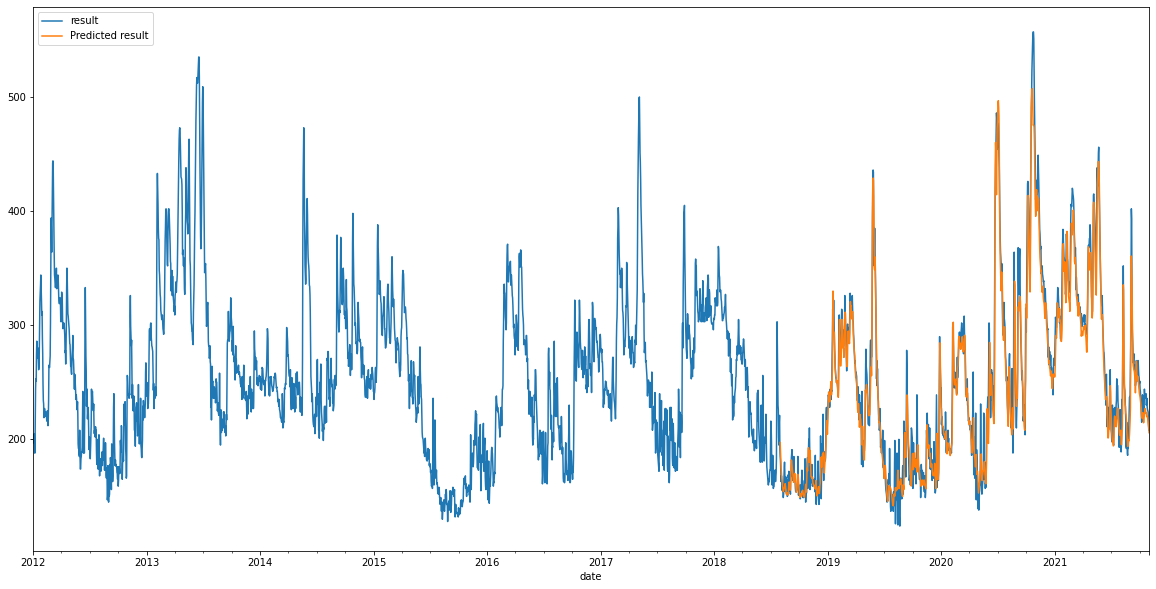

In [388]:
# generate the test set predictions
y_pred = model.predict(X_test)
y_pred = target_scaler.inverse_transform(y_pred)

# plot the test set predictions
df['Predicted result'] = np.nan
df['Predicted result'].iloc[- y_pred.shape[0]:] = y_pred.flatten()
df[['result', 'Predicted result']].plot(figsize=(20, 10))

In [389]:
n_future = 7

def prepare_for_iteration(f, y_pred):
  X_iter = []

  for i in range(sequence_length, df_test.shape[0] - n_future):
    X_i = df_test[features + target].iloc[i - sequence_length + f: i]
    features_diff = df_test[features].iloc[i: i + f]
    target_diff = y_pred[i - sequence_length]
    diff = np.column_stack((features_diff, target_diff))

    X_iter.append(np.append(X_i, diff, axis=0))

  return np.array(X_iter)


y_pred = np.empty((df_test.shape[0] - sequence_length - n_future, 0))
for f in range(n_future):
  x_f = prepare_for_iteration(f, y_pred)
  y_f = model.predict(x_f)
  
  y_pred = np.column_stack((y_pred, y_f))

y_pred = target_scaler.inverse_transform(y_pred)

37/37 [==============================] - 0s 11ms/step


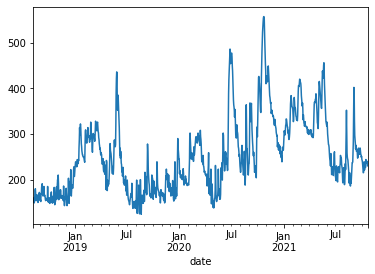

In [390]:
actual = lstm_data.iloc[split:, :].copy()
actual = actual.iloc[sequence_length + n_future - 1:actual.shape[0] - n_future - 1, 1]
actual.plot()

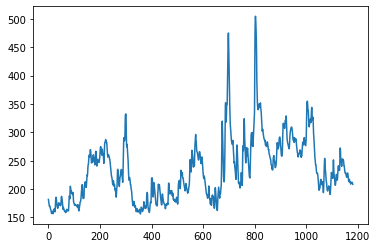

In [365]:
pd.Series(y_pred[:, n_future - 1]).plot()

In [391]:
res = pd.DataFrame(actual)
for i in range(n_future):
  res["predicted {} days ago".format(i + 1)] = y_pred[n_future - i:y_pred.shape[0] - i, i]
res

,result,predicted 1 days ago,predicted 2 days ago,predicted 3 days ago,predicted 4 days ago,predicted 5 days ago,predicted 6 days ago,predicted 7 days ago
date,,,,,,,,
2018-08-07,156.0,162.107293,162.943679,163.924019,164.425637,166.558842,167.877778,169.107957
2018-08-08,155.0,158.424672,159.095108,160.478046,161.533359,162.002590,163.953294,165.191903
2018-08-09,160.0,156.285996,156.134990,157.277538,158.791233,159.785692,160.217370,162.062832
2018-08-10,154.0,154.193905,154.404740,154.157795,155.380210,156.778498,157.676218,158.077427
2018-08-11,149.0,154.902804,155.458294,155.846792,155.564064,156.752960,158.062265,158.919854
...,...,...,...,...,...,...,...,...
2021-10-19,239.0,224.771131,221.754155,218.024538,213.457716,206.881647,204.953692,201.930445
2021-10-20,236.0,222.817346,220.255483,216.065368,212.551518,208.625548,202.843667,201.054898
2021-10-21,240.0,222.904612,219.028786,215.440630,211.470763,208.444090,204.990918,199.624273


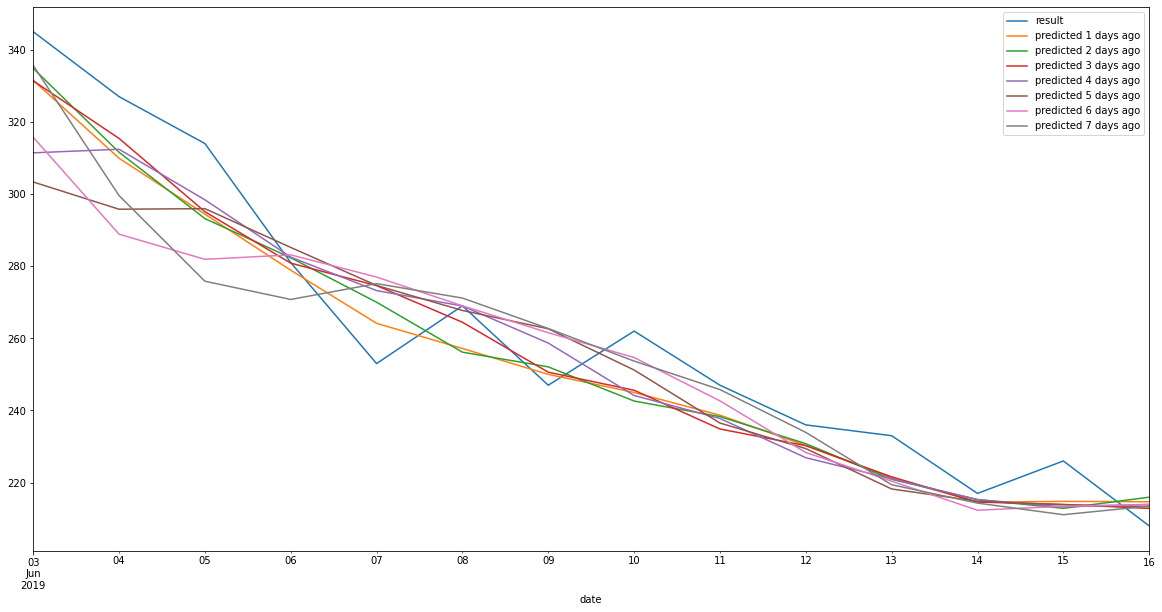

In [392]:
res.iloc[300: 314].plot(figsize=(20, 10))

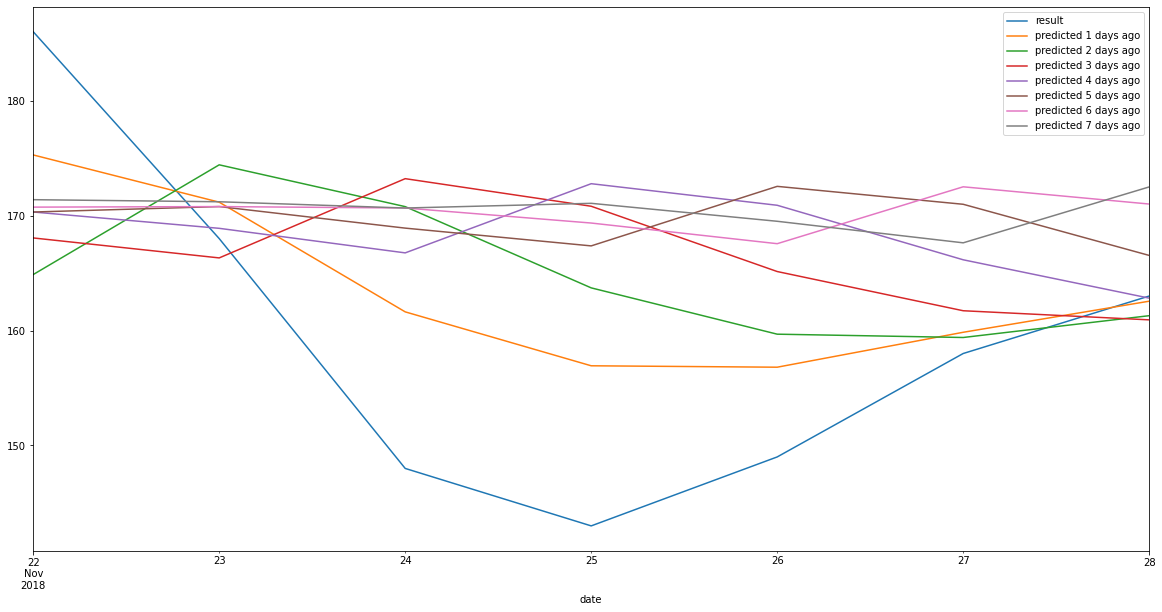

In [371]:
res.iloc[107: 114].plot(figsize=(20, 10))

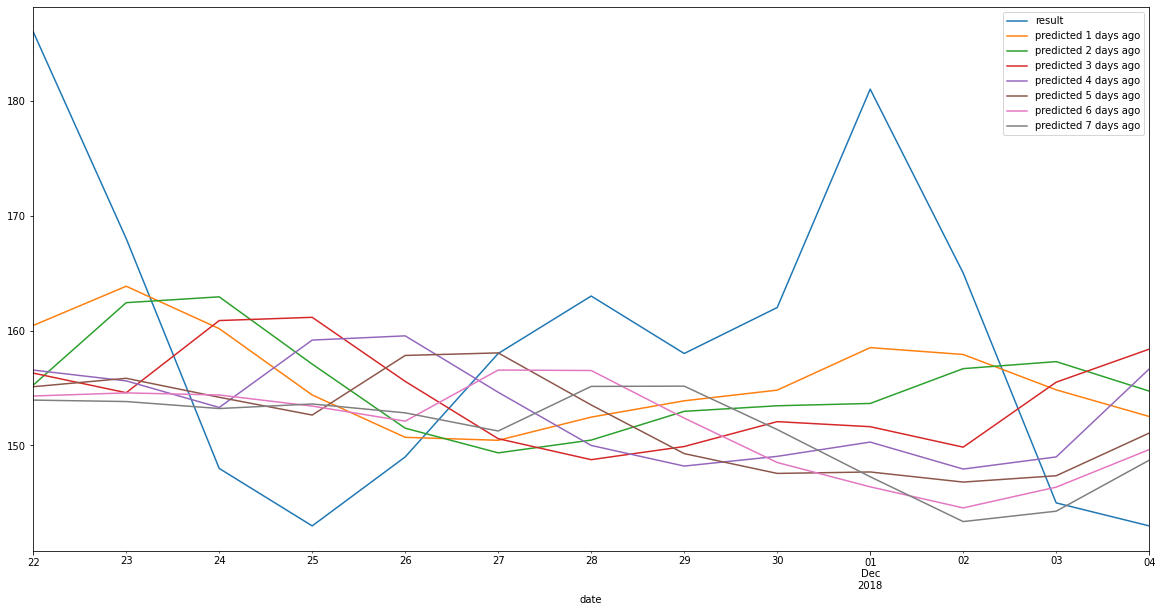

In [394]:
res.iloc[107: 120].plot(figsize=(20, 10))

In [395]:
!pip freeze

absl-py==1.3.0
aeppl==0.0.33
aesara==2.7.9
aiohttp==3.8.3
aiosignal==1.3.1
alabaster==0.7.12
albumentations==1.2.1
altair==4.2.0
appdirs==1.4.4
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
async-timeout==4.0.2
atari-py==0.2.9
atomicwrites==1.4.1
attrs==22.2.0
audioread==3.0.0
autograd==1.5
Babel==2.11.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==5.0.1
blis==0.7.9
bokeh==2.3.3
branca==0.6.0
bs4==0.0.1
CacheControl==0.12.11
cachetools==5.2.1
catalogue==2.0.8
certifi==2022.12.7
cffi==1.15.1
cftime==1.6.2
chardet==4.0.0
charset-normalizer==2.1.1
click==7.1.2
clikit==0.6.2
cloudpickle==2.2.0
cmake==3.22.6
cmdstanpy==1.0.8
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.3
cons==0.4.5
contextlib2==0.5.5
convertdate==2.4.0
crashtest==0.3.1
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.3.0
cvxpy==1.2.3
cycler==0.11.0
cymem==2.0.7
Cython==0.29.33
daft==0.0.4
dask==2022.2.1
datascience==0.17.5
db-dtypes==1.0.5
dbus-python==1.2.16
debugpy==1.0.0
decorator==4.4.2
de